# Breast Cancer Recurrence Prediction using Machine Learning

## Dataset

Variables in this dataset are:

***Class***: whether or not there has been a recurrence of cancer<br>
***Age***: patient's age at the time of diagnosis<br>
***Menopause***: menopausal status of the patient at the time of diagnosis, pre-menopausal (*premeno*) or post-menopausal (*ge40*, *lt40*) at the time of diagnosis:<br>
***Tumour Size***: the size of the tumour (mm) at the time of diagnosis<br>
***Invasive Nodes***: the total number of lymph nodes confirming Breast Cancer at the time of the histological examination<br>
***Node Caps***: whether the tumour penetrated in the lymph node capsule<br>
***Degree of Malignancy***: divided into 1 -2 or 3, depending on the malignancy of the tumour<br>
***Breast***: the position of the tumour (left or right breast)<br>
***Breast Quadrant***: the quadrant of the breast where the tumour is present<br>
***Irradiation***: whether radiation therapy has been used as a treatment to destroy cancer cells<br>

The data is provided as two separate ```.data``` files<br>
- ```breast-cancer.data```, containing the dataset 
- ```breast-cancer.names```, containing relevant informations about the dataset

In [1]:
# import the files
data = open("./breast-cancer.data")
feat = open("./breast-cancer.names")

data = data.read()
feat = feat.read()

In [2]:
# preview the first two rows of the dataset
print(data.split('\n',1)[0])
print(data.split('\n',2)[1])

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no


In [3]:
# view information about the dataset
print(feat)

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

In the informative, file we have important information about the dataset at *7. Attribute Information*. It is specified that the dataset includes missing values denoted with the attribute **'?'**

In [4]:
# replace missing dataset attributes to NAN
data = data.replace('?','')

<ins>*for Giovanni Notes*:</ins> I prefered to replace the missing data attribute from ***?*** to ***NAN*** straight away while still as a ***str*** file

## Exploratory Data Analysis

### Transforming to DataFrame

The data is stored as ```str```. It is necessary to convert it to ```DataFrame``` format

In [5]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data)) #check the data variable is a pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>


Now that the data is correctly converted into a DataFrame table, I will rename the columns according to the attributes in the ```.names``` file

In [7]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
data.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [8]:
# preview the DataFrame table created
data.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


### Explore the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumour_size  285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    277 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  284 non-null    object
 9   irrad        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


All the variables in the dataset are of type ```object```, except for ```'deg_malig'```.

<ins>*for Giovanni Notes*:</ins> the data shows in fact there are missing values *277 of 285* in ```'node_caps'``` attribute and *284 of 285* in ```'breast_quad'```

In [10]:
data.describe()

,deg_malig
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<ins>*for Giovanni Notes*:</ins> is it useless to print ```.describe()``` in this case?

### Explore the Attributes

I want to have a more thorough look at the data inside each attribute, starting from ```'class'``` which contains information about recurrence of Breast Cancer.

<AxesSubplot:>

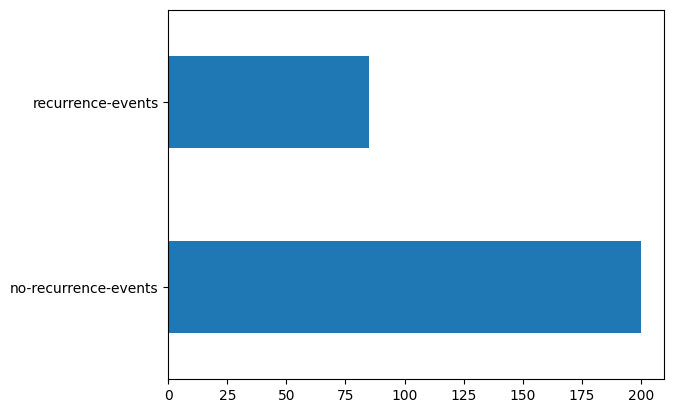

In [11]:
class_ = data['class'].value_counts()
class_.plot.barh()

About 70% of the dataset includes patients that didn't experience a recurrence of the disease.

<AxesSubplot:>

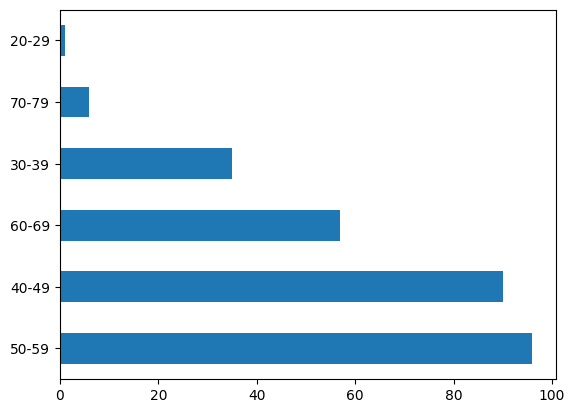

In [12]:
age_ = data['age'].value_counts()
age_.plot.barh()

Most patients in the dataset fall into the age group *40-59* which will probably result in a somewhat even value count of Pre-menopause (*premeno*) and Menopause (*lt40* and *ge40* are both values representing menopause).

<AxesSubplot:>

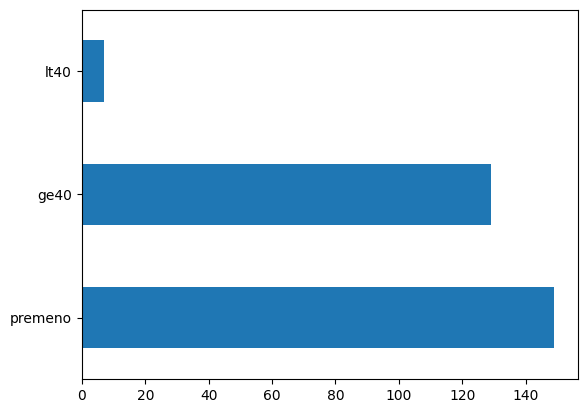

In [13]:
menopause_ = data['menopause'].value_counts()
menopause_.plot.barh()

<AxesSubplot:>

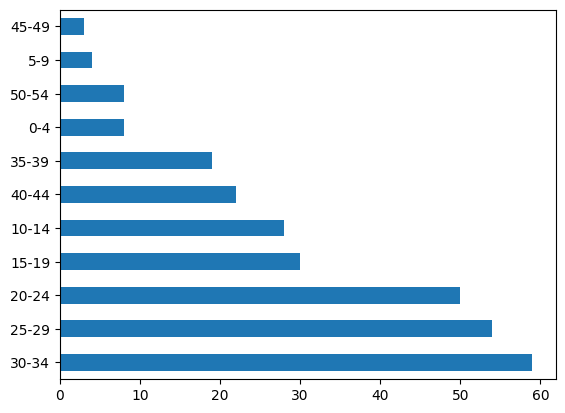

In [14]:
tumour_size_ = data['tumour_size'].value_counts()
tumour_size_.plot.barh()

```'tumour_size'``` is expressed in mm.<br>
In the dataset, most tumour sizes fall into the *20mm-34mm* group.

<AxesSubplot:>

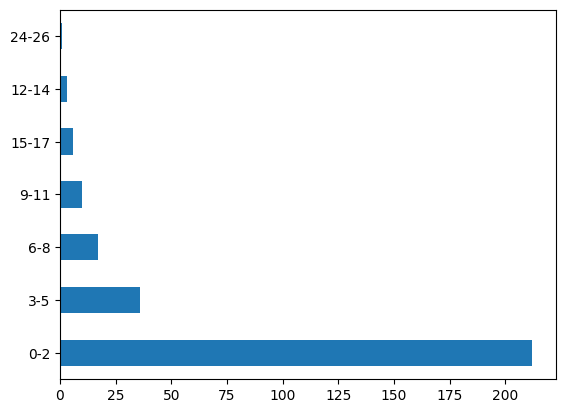

In [15]:
inv_nodes_ = data['inv_nodes'].value_counts()
inv_nodes_.plot.barh()

Most number of lymph nodes that resulted invaded by the tumour fall into the group "*0-2* lymph nodes invaded".

<AxesSubplot:>

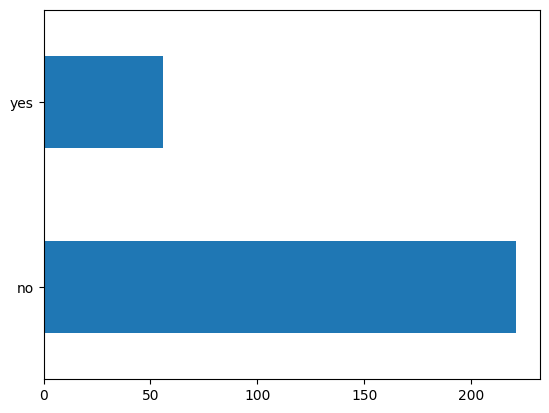

In [16]:
node_caps_ = data['node_caps'].value_counts()
node_caps_.plot.barh()

Most lymph nodes that were removed from the patient didn't result to have the capsule perforated.

<AxesSubplot:>

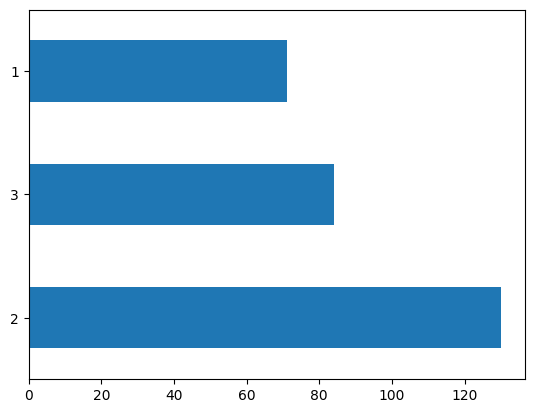

In [17]:
deg_malig_ = data['deg_malig'].value_counts()
deg_malig_.plot.barh()

The most common degree of malignancy for the patients in the dataset is *2*.

<AxesSubplot:>

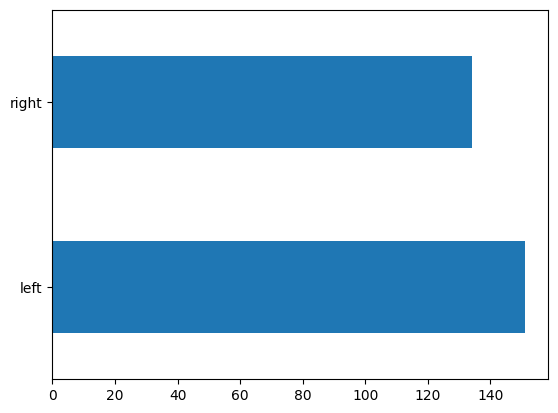

In [18]:
breast_ = data['breast'].value_counts()
breast_.plot.barh()

<AxesSubplot:>

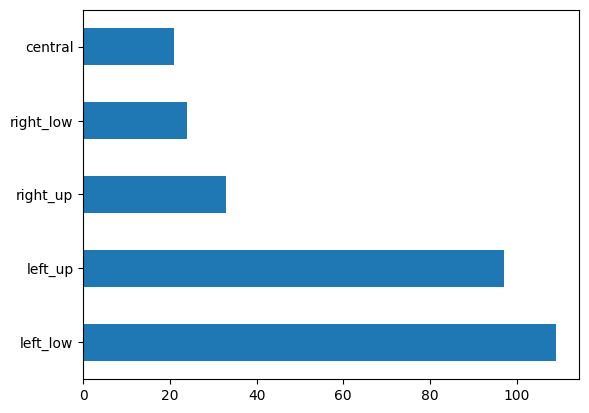

In [19]:
breast_quad_= data['breast_quad'].value_counts()
breast_quad_.plot.barh()

The breast count is even *right* and *left* while the quadrant has a higher value count on the *left_up* and *left_low* group.

<AxesSubplot:>

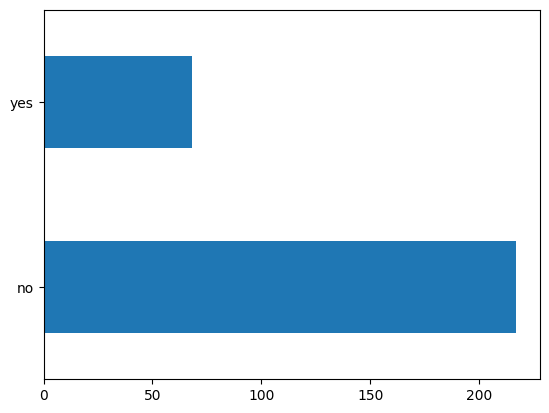

In [20]:
irrad_ = data['irrad'].value_counts()
irrad_.plot.barh()

Most of the patients in this dataset didn't undergo Radiation Therapy.<br>
<font size="3">_*radiation therapy: a cancer treatment that uses high doses of radiation to kill cancer cells and shrink tumours.*_</font>

**Missing Values**<br>
There were missing values on the dataset.

In [21]:
# identify where the missing values are in the dataset
data.isna().any()

class          False
age            False
menopause      False
tumour_size    False
inv_nodes      False
node_caps       True
deg_malig      False
breast         False
breast_quad     True
irrad          False
dtype: bool

Both ```'node_caps'``` and ```'breast_quad'``` columns have missing values.

In [22]:
# find % of missing values per single attribute in the dataset
nan = data.isna().sum()
tot = data.count()
perc = (nan*100)/tot

In [23]:
perc

class          0.000000
age            0.000000
menopause      0.000000
tumour_size    0.000000
inv_nodes      0.000000
node_caps      2.888087
deg_malig      0.000000
breast         0.000000
breast_quad    0.352113
irrad          0.000000
dtype: float64

I will replace ```object``` attributes to ```int64``` to have valid data to train the machine learning model and to analyse the correlation between attributes.<br>
So I will replace missing data with a value that won't be relevant to the analysis.

In [24]:
# replace missing data 
data['node_caps'] = data['node_caps'].fillna(5)
data['breast_quad'] = data['breast_quad'].fillna(8)

I will check outliers on the only numerical column in the dataset ```'deg_malig'```.

In [25]:
# import the library
import seaborn as sns

<AxesSubplot:xlabel='deg_malig'>

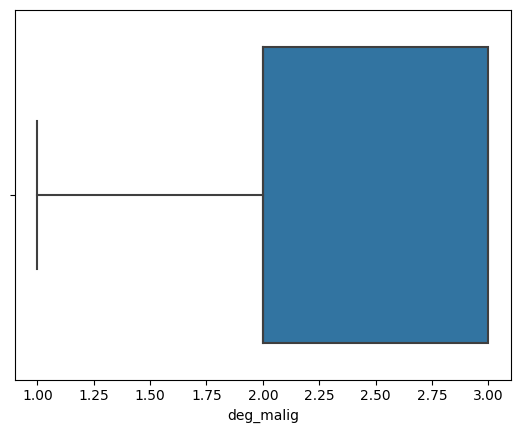

In [26]:
sns.boxplot(x=data['deg_malig'])

Now I replace all DataFrame values into numerical values to convert column type from ```'object'``` to ```'int64'```.

In [27]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])

A quick overview on the newly modified dataset using a histogram, respectively for ```'no-recurrence-events'``` and ```'recurrence-events'```.

class
0    [[AxesSubplot(0.125,0.722857;0.215278x0.157143), AxesSubplot(0.404861,0.722857;0.215278x0.157143), AxesSubplot(0.684722,0.722857;0.215278x0.157143)], [AxesSubplot(0.125,0.518571;0.215278x0.157143), AxesSubplot(0.404861,0.518571;0.215278x0.157143), AxesSubplot(0.684722,0.518571;0.215278x0.157143)], [AxesSubplot(0.125,0.314286;0.215278x0.157143), AxesSubplot(0.404861,0.314286;0.215278x0.157143), AxesSubplot(0.684722,0.314286;0.215278x0.157143)], [AxesSubplot(0.125,0.11;0.215278x0.157143), AxesSubplot(0.404861,0.11;0.215278x0.157143), AxesSubplot(0.684722,0.11;0.215278x0.157143)]]
1    [[AxesSubplot(0.125,0.722857;0.215278x0.157143), AxesSubplot(0.404861,0.722857;0.215278x0.157143), AxesSubplot(0.684722,0.722857;0.215278x0.157143)], [AxesSubplot(0.125,0.518571;0.215278x0.157143), AxesSubplot(0.404861,0.518571;0.215278x0.157143), AxesSubplot(0.684722,0.518571;0.215278x0.157143)], [AxesSubplot(0.125,0.314286;0.215278x0.157143), AxesSubplot(0.404861,0.314286;0.215278x0.157143), Ax

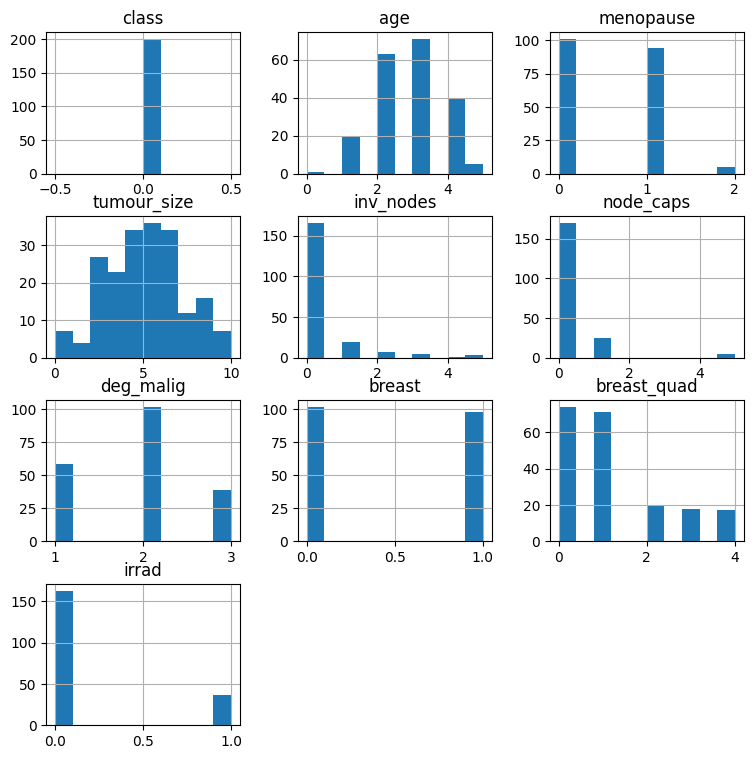

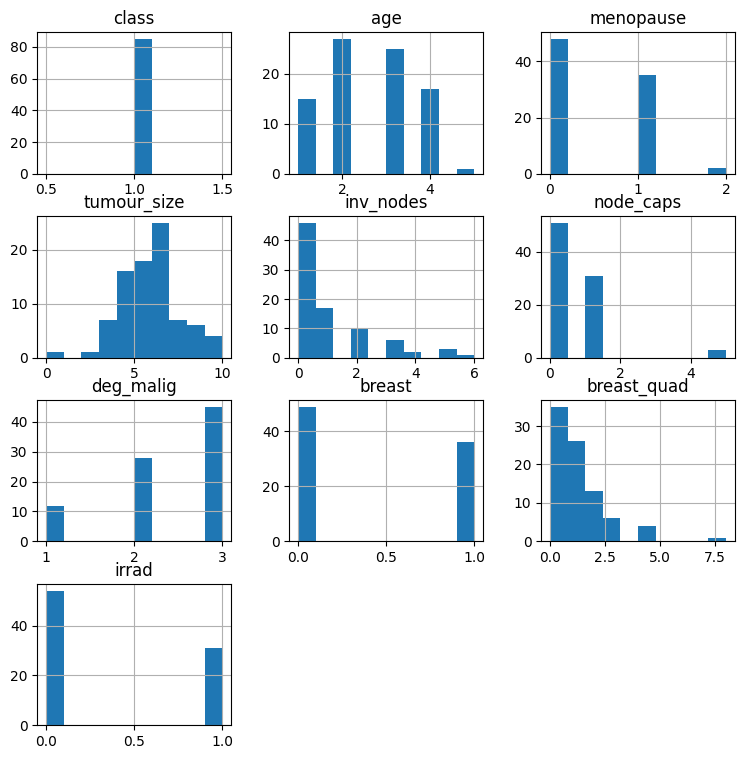

In [28]:
data.groupby('class').hist(figsize=(9,9))

### Correlation Between Attributes and Identification of Target Attributes

**Reference Information about Breast Cancer**

According to the research paper *The incidence of Breast Cancer Recurrence 10-32 Years After Primary Diagnosis*, "[...] **Women with high lymph node burden, large tumor size, and estrogen receptor–positive tumors had increased risk of late recurrence**."<br>
<font size='2'>*(J Natl Cancer Inst. 2022 Mar; 114(3): 391–399. Published online 2021 Nov 8. doi: 10.1093/jnci/djab202 PMCID: PMC8902439PMID: 34747484)*</font>

<br>

According to the medical paper *Understanding ER-positive breast cancer*, "[...] **Females with a longer lifetime exposure to estrogen and progesterone may have a higher risk of developing hormone receptor-positive breast cancer. This includes women who start menstruating early or reach menopause late**."<br>
<font size='2'>*(Medically reviewed by Faith Selchick, DNP, AOCNP, Nursing, Oncology — By Jenna Fletcher on May 22, 2022)*</font>

<br>

According to the medical paper *Hormone therapy for breast cancer*, "[...] **Hormone therapy following surgery, radiation or chemotherapy has been shown to reduce the risk of breast cancer recurrence in people with early-stage hormone-sensitive breast cancers. It can also effectively reduce the risk of metastatic breast cancer growth and progression in people with hormone-sensitive tumors**."<br>
<font size='2'>*(https://www.mayoclinic.org/tests-procedures/hormone-therapy-for-breast-cancer/about/pac-20384943)*</font>

<br>

According to the medical paper *Radiotherapy for breast cancer*, "[...] **People with a very low risk of the cancer coming back may only have port of the breast treated with radiotherapy. Or they may not have radiotherapy at all**."<br>
<font size='2'>*(https://www.cancerresearchuk.org/about-cancer/breast-cancer/treatment/radiotherapy/radiotherapy-treatment)*</font>

<br>


According to the medical paper *What Types of Breast Cancer Have the Highest Recurrence Rates?*, "[...] **Aggressive breast cancers are harder to treat, more likely to spread, and more likely to recur. The two types of breast cancer most likely to recur are inflammatory breast cancer (IBC) and triple-negative breast cancer (TNBC)**."<br>
<font size='2'>*(Medically reviewed by Faith Selchick, DNP, AOCNP, Nursing, Oncology — By S. Behring on December 19, 2022)*</font>

<br>

**Target Attribute Identification**

The target attribute is ```'class'``` as the ML model should predict if a patient is likely to experience a recurrence of Breast Cancer.

<br>

**Correlation Between Attributes**

In [29]:
# compute the correlation between attributes
data.corr()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
class,1.000000,-0.075897,-0.051173,0.176498,0.275416,0.150370,0.303457,-0.060927,-0.021065,0.192887
age,-0.075897,1.000000,0.670007,-0.007522,-0.047671,0.085208,-0.079114,-0.047497,-0.049250,-0.045551
menopause,-0.051173,0.670007,1.000000,-0.028768,-0.007281,0.150862,0.012875,-0.080146,-0.015359,-0.077055
tumour_size,0.176498,-0.007522,-0.028768,1.000000,0.169965,0.082399,0.216500,0.051622,-0.127032,0.165634
inv_nodes,0.275416,-0.047671,-0.007281,0.169965,1.000000,0.389470,0.336050,-0.022711,-0.048774,0.324007
node_caps,0.150370,0.085208,0.150862,0.082399,0.389470,1.000000,0.057153,-0.072507,-0.052898,0.326124
deg_malig,0.303457,-0.079114,0.012875,0.216500,0.336050,0.057153,1.000000,-0.048827,-0.021964,0.211362
breast,-0.060927,-0.047497,-0.080146,0.051622,-0.022711,-0.072507,-0.048827,1.000000,0.088991,0.016957
breast_quad,-0.021065,-0.049250,-0.015359,-0.127032,-0.048774,-0.052898,-0.021964,0.088991,1.000000,-0.077076
irrad,0.192887,-0.045551,-0.077055,0.165634,0.324007,0.326124,0.211362,0.016957,-0.077076,1.000000


There is an evident correlation between ```'age'``` and ```'menopause'```, for obvious reasons.<br>
```'node_caps'```, ```'inv_nodes'```, ```'deg_malig'``` and ```'irrad'```are also correlated.<br>

I want to visualize the correlations using a Heatmap.

<AxesSubplot:>

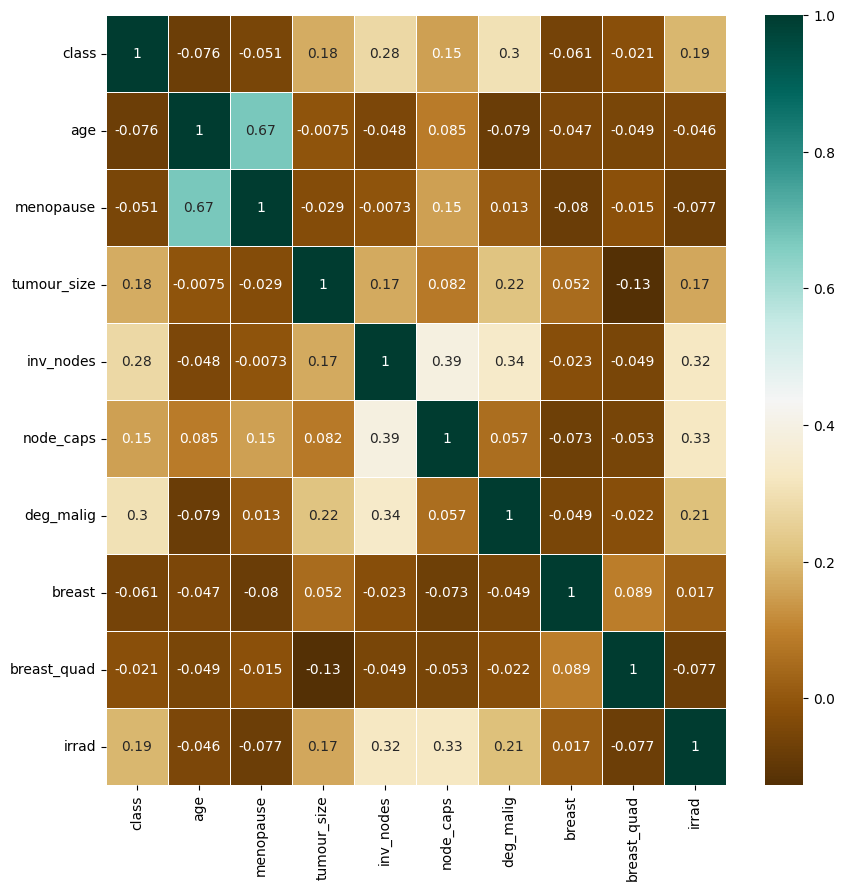

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), cmap='BrBG', annot=True, linewidth=.5)

Before analyzing the correlations between the attributes, I want to visualize the correlation between the target attribute ```'class'``` and the other attributes of the dataset.

<AxesSubplot:>

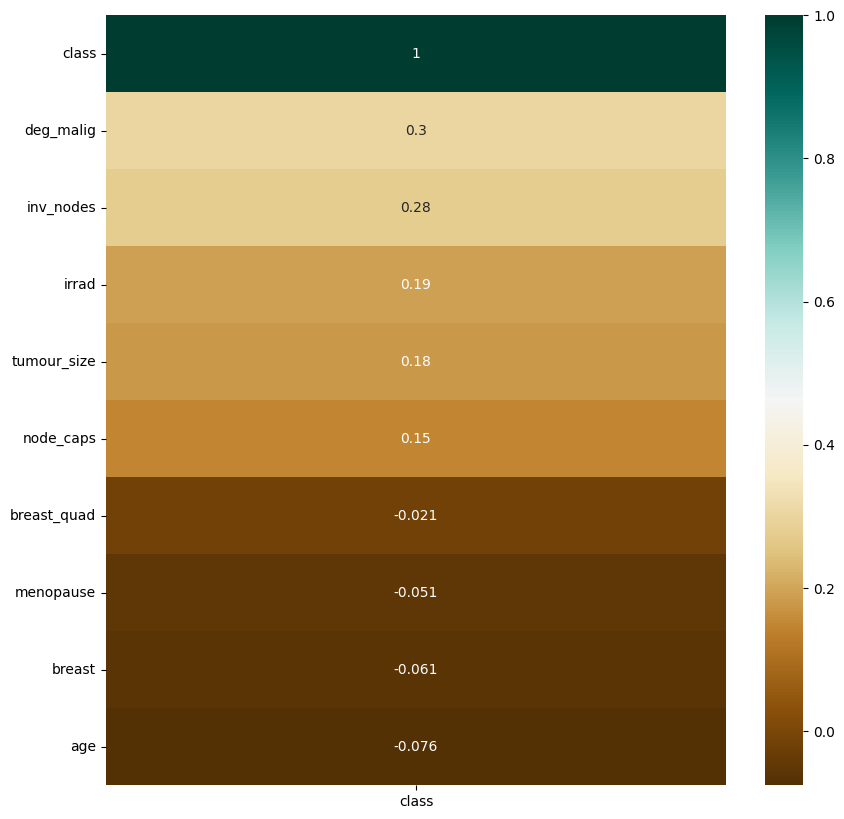

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr()[['class']].sort_values(
    by='class', ascending=False),annot=True,cmap='BrBG')

The highest correlation with the target attribute ```'class'``` (*recurrence or not recurrence event*) is the degree of malignancy ```'deg_malig'``` of the tumour.<br>

As stated earlier, *aggressive breast cancers are harder to treat, more likely to spread and more likely to reoccur*. I notice also that the number of invaded lymph nodes ```'inv_nodes'``` is highly correlated with the ```'class'``` as well as ```'node_caps'``` (*whether the tumor penetrated in the lumph node capsule*), preceding ```'irrad'``` in the correlation heatmap. 

I want to dig deeper into the correlation between the target attribute and the *degree of malignancy* of the tumour.<br>
One hypothesis is that the more aggressive cancer is the more likely the patient will experience recurrence.

In [32]:
from IPython.display import display

<ins>*for Giovanni Notes*:</ins> *'from IPython.display import display'* is only used in the *corr_analysis* function to visualize the table in a standard Jupyther Notebook format.<br>

<ins>*for Giovanni Notes*:</ins> I created a series of functions to make correlation analysis between attributes easier as I am performing the same tasks for each pair of attributes.

In [33]:
# create functions to analyse correlations between attributes including crosstab(), heatmap(), plot()
def corr_analysis(x,y):
    display(crosstab(x,y))
    heatmap(x,y)
    plot(crosstab(x,y),x,y)
    return 


# create a crosstab
def crosstab(x,y):
    crosstab = pd.crosstab(
                    data[x],
                    data[y],
                    margins=True,
                    normalize=True,
                )
    return crosstab


# visualize the correlation in the crosstab using a heatmap
def heatmap(x,y):
    heatmap = sns.heatmap(pd.crosstab(data[x], data[y]), cmap="YlGnBu", annot=True)
    return heatmap

    
# plot the crosstab
def plot(crosstab, x, y):
    crosstab.plot.bar(rot=0, width=0.4)
    x = str(x)
    y = str(y)
    plt.xlabel(x)
    plt.ylabel("Correlation %")
    plt.title('Correlation Plot Between '+ x +' and '+ y)
    return

deg_malig,1,2,3,All
class,,,,
0,0.207018,0.357895,0.136842,0.701754
1,0.042105,0.098246,0.157895,0.298246
All,0.249123,0.456140,0.294737,1.000000


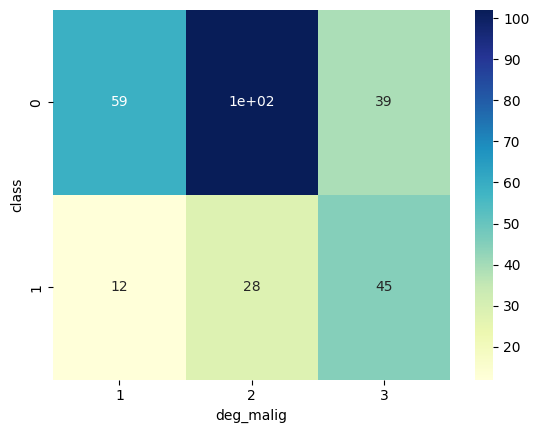

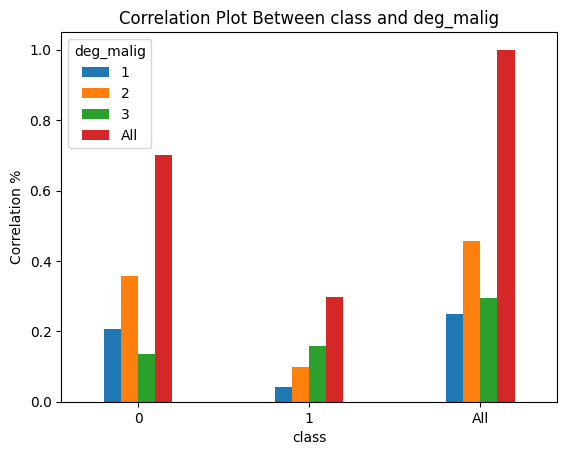

In [34]:
# run the function with 'class' and 'deg_malig'
corr_analysis('class', 'deg_malig')

By a quick look at the barplot, there is a proportional correlation between the aggressiveness of the tumour and the recurrence event.<br>
I want to dig deeper into that and see if the **proportion of patients having the highest degree of malignancy over all the patients of that class had a recurrence event higher than the patient who didn't experience recurrence**.

<ins>*for Giovanni Notes*:</ins> I created a series of function to make proportion calculations between attribute values easier as I am performing the same tasks for each pair of attributes.

In [35]:
# function to calculate proportion based on attribute values
def proportion(x,x_n,y,y_n):
    tot = data[data[x]==x_n]
    part = tot[tot[y]==y_n]
    part = part[x].value_counts()
    tot = tot[x].value_counts()
    result = round(((part / tot) *100), 2)
    result = float(result)
    return result

<ins>*for Giovanni Notes*:</ins> I am saving the proportion() results into bp_n _n+1 to plot the results later

In [36]:
bp1 = proportion('deg_malig',3,'class',1)
print(bp1,"% of patients who got the tumour with the highest aggressiveness experienced a recurrence")

53.57 % of patients who got the tumour with the highest aggressivness experienced a recurrence


In [37]:
bp2 = proportion('deg_malig',1,'class',0)
print(bp2,"% of patients who got the tumour with the lowest aggressiveness didn't experience a recurrence")

83.1 % of patients who got the tumour with the lowest aggressivness didn't experience a recurrence


**46.43%** of patients who got the tumour with the highest aggressiveness didn't experience a recurrence while **16.9%** of patients who got the tumour with the lowest aggressiveness did experience a recurrence.<br>
In the bar plot I notice a high proportion of degree type 2 for the patients class who didn't experience recurrence.

In [38]:
bp3 = proportion('deg_malig',2,'class',0)
print(bp3,"% of patients who got the tumour with 2 degrees of malignancy didn't experienced a recurrence")

78.46 % of patients who got the tumour with 2 degrees of malignancy didn't experienced a recurrence


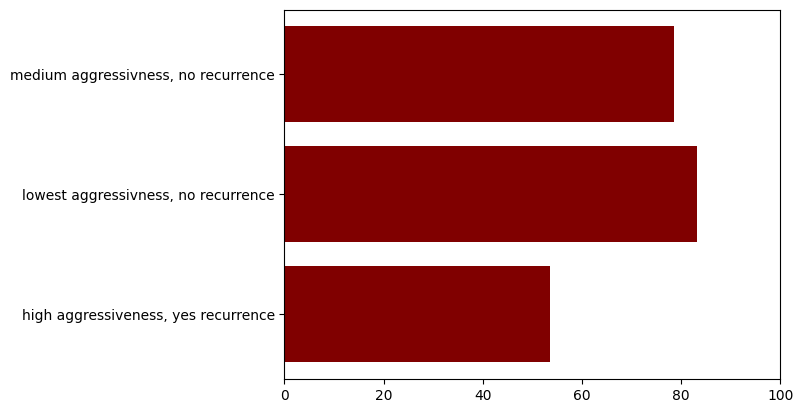

In [39]:
plt.barh(['high aggressiveness, yes recurrence','lowest aggressiveness, no recurrence', 'medium aggressiveness, no recurrence'], [bp1,bp2,bp3], color='maroon')
plt.xlim(0, 100)
plt.show()

For the median degree of malignancy (type 2), a total of **21.54%** of patients experienced a recurrence.<br>

From this quick analysis, I can say that the correlation between aggressiveness of the tumour and probability of recurrence is stronger for low degrees of malignancy. It isn't a only factor for high degrees of aggressiveness.

Generally, the more aggressive (*malignant*) is the tumour the more it will spread and attack lymph nodes. For the same reason, there will be a higher percentage of patients with tumour that penetrated the lymph nodes capsule. <br>

Usually for biopsy, about 10 to 40 nodes that contain cancer cells are removed for analysis. If the lymph node has a very low to no cancer cells count it is usually not removed and the patient has to undergo further therapies, such as Radiation Therapy.

<font size="3">_*biopsy: an examination of tissue removed from a living body to discover the presence, cause, or extent of a disease.*_</font>

I want to dig deeper into the correlation between ```'class'``` with ```'inv_nodes'``` and ```'node_caps'```.

inv_nodes,0,1,2,3,4,5,6,All
class,,,,,,,,
0,0.582456,0.066667,0.024561,0.014035,0.003509,0.010526,0.000000,0.701754
1,0.161404,0.059649,0.035088,0.021053,0.007018,0.010526,0.003509,0.298246
All,0.743860,0.126316,0.059649,0.035088,0.010526,0.021053,0.003509,1.000000


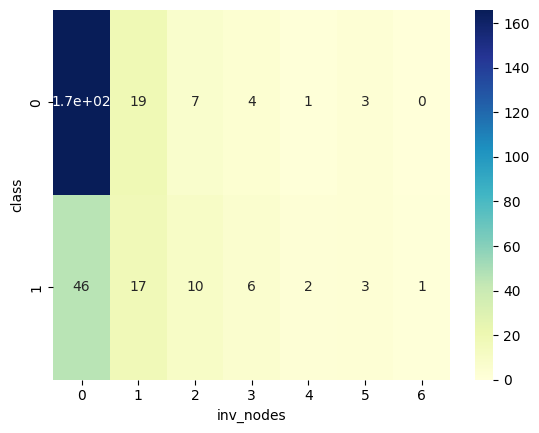

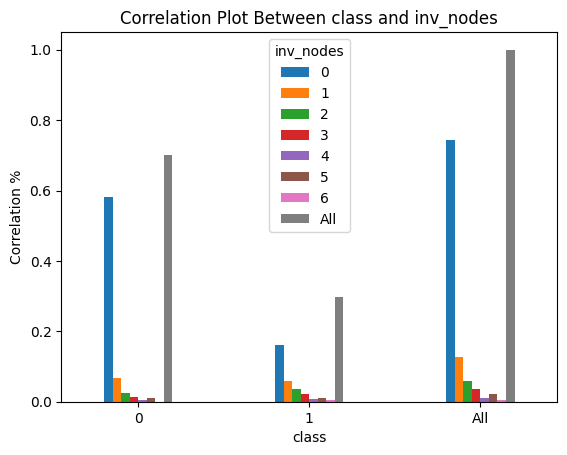

In [40]:
corr_analysis('class', 'inv_nodes')

node_caps,0,1,5,All
class,,,,
0,0.596491,0.087719,0.017544,0.701754
1,0.178947,0.108772,0.010526,0.298246
All,0.775439,0.196491,0.028070,1.000000


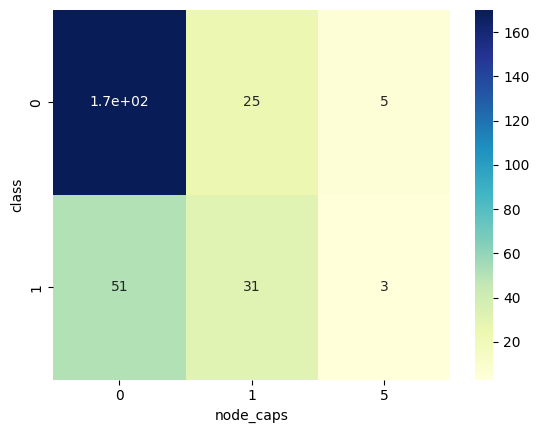

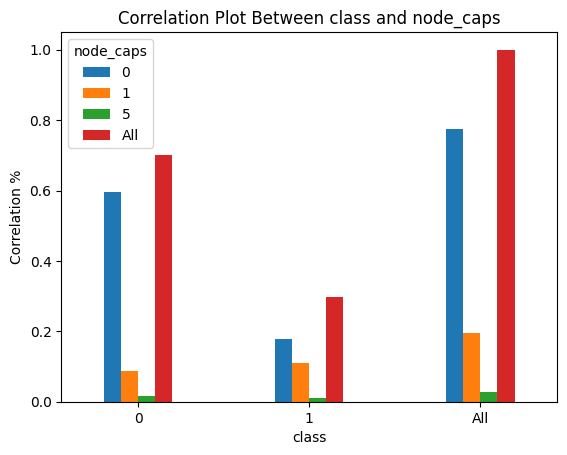

In [41]:
corr_analysis('class', 'node_caps')

By a quick look at the two barplots, there seems to be a proportional correlation between the number of lymph nodes, whether they had the capsule pierced and the recurrence class.<br>

I want to dig deeper into that. I want to see if the **proportion of patients having a high invasion of lymph nodes count had higher capsules pierced over all the patients that had pierced lymph node capsules**.

node_caps,0,1,5,All
inv_nodes,,,,
0,0.701754,0.031579,0.010526,0.743860
1,0.052632,0.066667,0.007018,0.126316
2,0.010526,0.049123,0.000000,0.059649
3,0.003509,0.021053,0.010526,0.035088
4,0.003509,0.007018,0.000000,0.010526
5,0.003509,0.017544,0.000000,0.021053
6,0.000000,0.003509,0.000000,0.003509
All,0.775439,0.196491,0.028070,1.000000


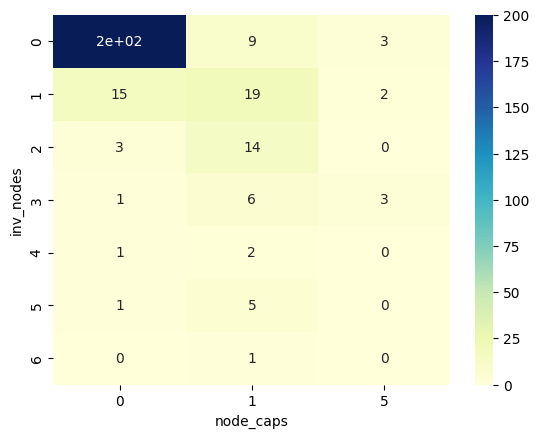

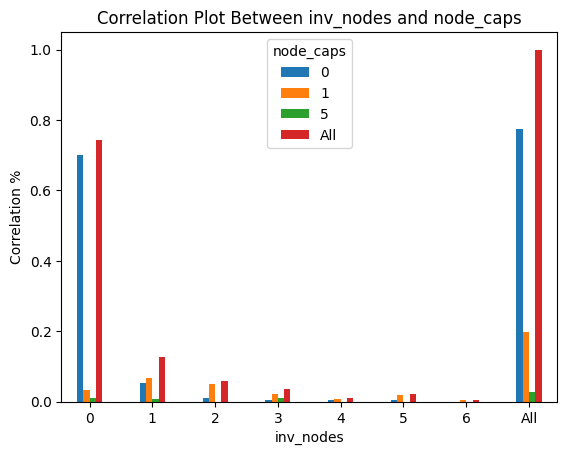

In [42]:
corr_analysis('inv_nodes', 'node_caps')

In [43]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 7:
    res = proportion('inv_nodes',count,'node_caps',1)
    print(res,"% of patients who got group",count,'lymph nodes and had lymph nodes with pierced capsule')
    lis.append(res)
    count +=1

4.25 % of patients who got group 0 lymph nodes and had lymph nodes with pierced capsule
52.78 % of patients who got group 1 lymph nodes and had lymph nodes with pierced capsule
82.35 % of patients who got group 2 lymph nodes and had lymph nodes with pierced capsule
60.0 % of patients who got group 3 lymph nodes and had lymph nodes with pierced capsule
66.67 % of patients who got group 4 lymph nodes and had lymph nodes with pierced capsule
83.33 % of patients who got group 5 lymph nodes and had lymph nodes with pierced capsule
100.0 % of patients who got group 6 lymph nodes and had lymph nodes with pierced capsule


<ins>*for Giovanni Notes*:</ins> inv_nodes values are divided into 7 different groups so iterated the function for each group

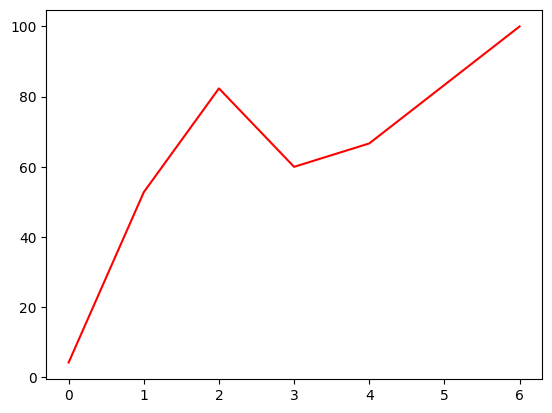

In [44]:
yax = np.array(lis)
plt.plot(yax, color = 'r')
plt.show()

The more the number of invaded lymph nodes the more likely their capsule will be perforated.<br>
What is the correlation with number of invaded lymph nodes, nodes with pierced capsule and a recurrence event?

I want to dig into that by computing the **proportion of patients with degree of malignancy 3 and group number of invaded nodes over all patients of that class**.

deg_malig,1,2,3,All
inv_nodes,,,,
0,0.235088,0.343860,0.164912,0.743860
1,0.010526,0.070175,0.045614,0.126316
2,0.000000,0.024561,0.035088,0.059649
3,0.003509,0.014035,0.017544,0.035088
4,0.000000,0.000000,0.010526,0.010526
5,0.000000,0.003509,0.017544,0.021053
6,0.000000,0.000000,0.003509,0.003509
All,0.249123,0.456140,0.294737,1.000000


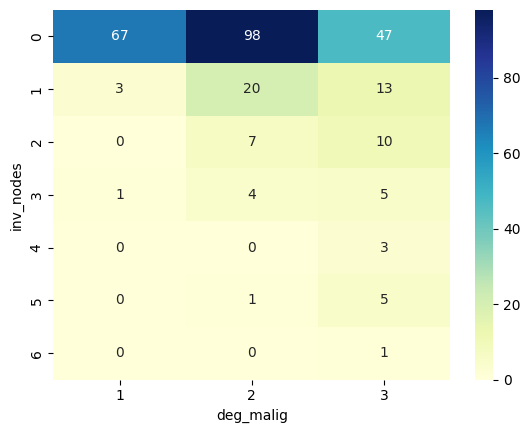

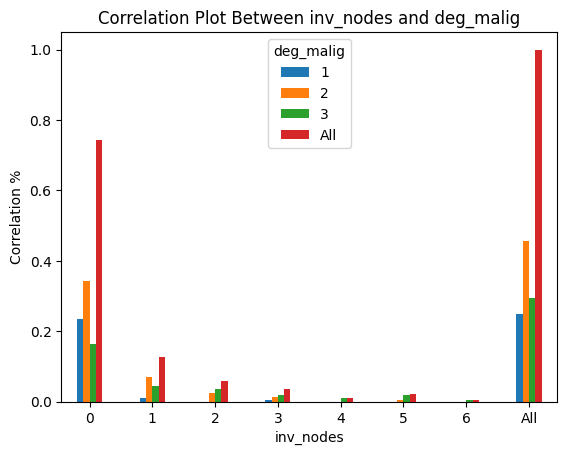

In [45]:
corr_analysis('inv_nodes', 'deg_malig')

In [46]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 7:
    res = proportion('inv_nodes',count,'deg_malig',3)
    print(res,"% of patients who got group",count,'lymph nodes and had degree of malignancy type 3')
    lis.append(res)
    count +=1

22.17 % of patients who got group 0 lymph nodes and had degree of malignancy type 3
36.11 % of patients who got group 1 lymph nodes and had degree of malignancy type 3
58.82 % of patients who got group 2 lymph nodes and had degree of malignancy type 3
50.0 % of patients who got group 3 lymph nodes and had degree of malignancy type 3
100.0 % of patients who got group 4 lymph nodes and had degree of malignancy type 3
83.33 % of patients who got group 5 lymph nodes and had degree of malignancy type 3
100.0 % of patients who got group 6 lymph nodes and had degree of malignancy type 3


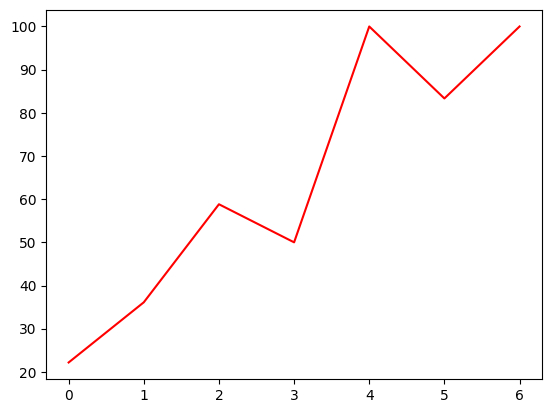

In [47]:
yax = np.array(lis)
plt.plot(yax, color = 'r')
plt.show()

For all patients having the highes degree of malignancy, there is a bigger portion having more invaded lymph nodes.

node_caps,0,1,5,All
deg_malig,,,,
1,0.231579,0.000000,0.017544,0.249123
2,0.361404,0.091228,0.003509,0.456140
3,0.182456,0.105263,0.007018,0.294737
All,0.775439,0.196491,0.028070,1.000000


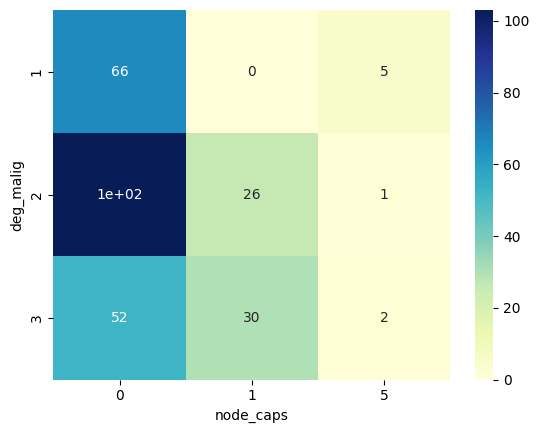

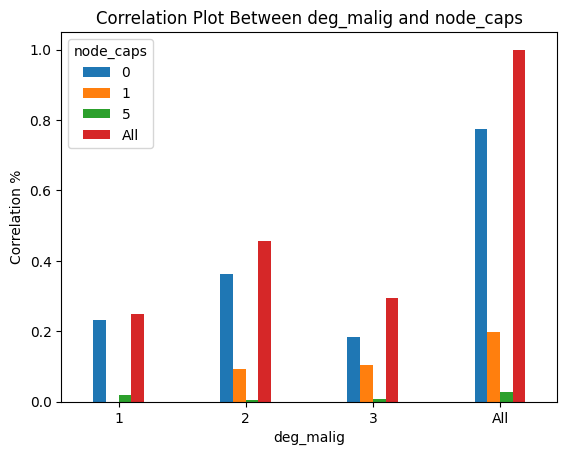

In [48]:
corr_analysis('deg_malig', 'node_caps')

Radiation as a therapy is not mandatory for every patient. It is used to reduce the patient's risk of breast cancer recurring after surgery. It is also commonly used to ease the symptoms caused by cancer that has spread to other parts of the body (*metastatic breast cancer*).<br>

I want to see the correlation between ```'class'``` and ```'irrad'```.

irrad,0,1,All
class,,,
0,0.571930,0.129825,0.701754
1,0.189474,0.108772,0.298246
All,0.761404,0.238596,1.000000


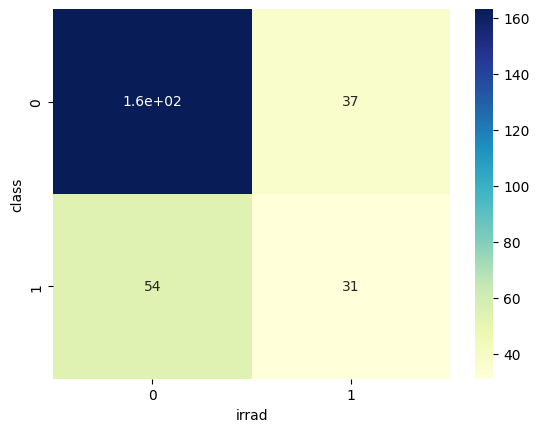

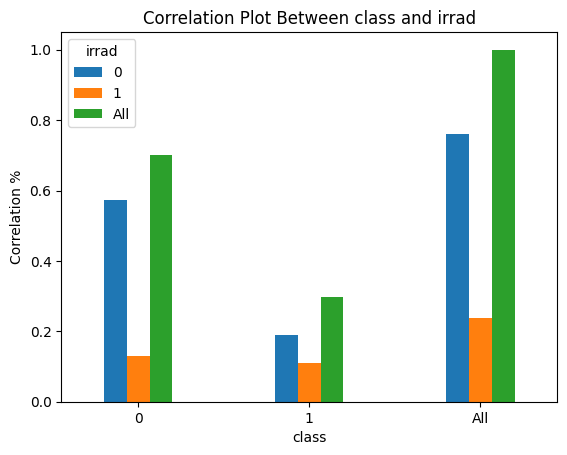

In [49]:
corr_analysis('class', 'irrad')

In [50]:
bp1 = proportion('irrad',1,'class',0)
print(bp1,"% of patients that got radiation therapy and didn't experience recurrence later on")

54.41 % of patients that got radiation therapy and didn't experience recurrence later on


In [51]:
bp2 = proportion('irrad',0,'class',1)
print(bp2,"% of patients that didn't get radiation therapy and experienced recurrence later on")

24.88 % of patients that didn't get radiation therapy and experienced recurrence later on


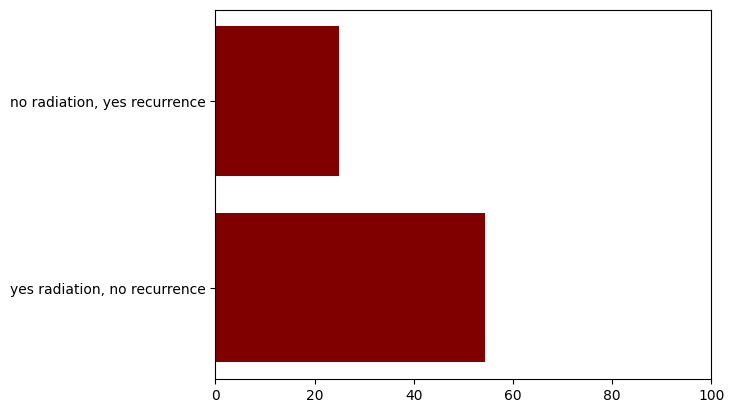

In [52]:
plt.barh(['yes radiation, no recurrence','no radiation, yes recurrence'], [bp1,bp2], color='maroon')
plt.xlim(0, 100)
plt.show()

There are about 45.59% of patients that got radiation therapy and still experienced recurrence later on and about 75.12% of patients that didn't get radiation therapy and didn't experience recurrence.<br>

I can assume that radiation therapy prevents recurrence but not for all patients.

There is clearly a higher proportion of patient that got radiation therapy ```'irrad' == 1``` and still experienced a recurrence of the disease ```'class' == 1```.<br>
**According to this dataset, undergoing radiation therapy isn't enough to prevent recurrence.**

I want to visualize the correlation between ```'class'``` and ```'tumour_size'```.

class,0,1,All
tumour_size,,,
0,0.024561,0.003509,0.028070
1,0.014035,0.000000,0.014035
2,0.094737,0.003509,0.098246
3,0.080702,0.024561,0.105263
4,0.119298,0.056140,0.175439
5,0.126316,0.063158,0.189474
6,0.119298,0.087719,0.207018
7,0.042105,0.024561,0.066667
8,0.056140,0.021053,0.077193


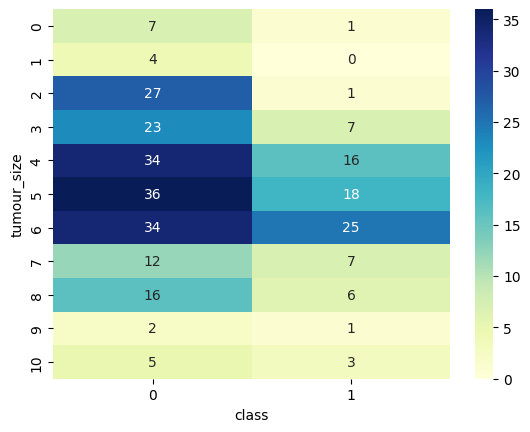

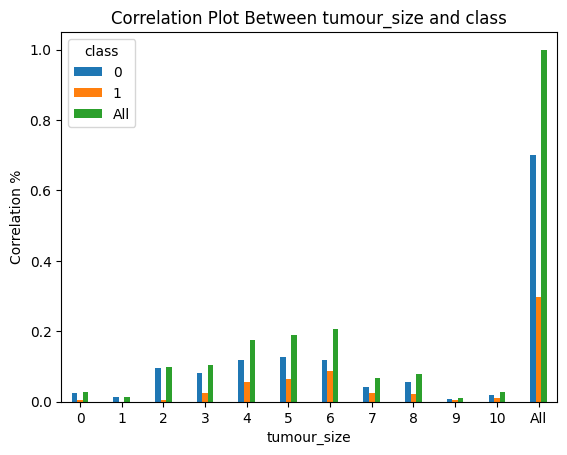

In [53]:
corr_analysis('tumour_size', 'class')

In [54]:
# run through a while loop to iterate proportion() for 11 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'class',1)
    print(res,"% of patients who had group",count,'tumour size and experienced a recurrence event')
    lis.append(res)
    count +=1

12.5 % of patients who had group 0 tumour size and experienced a recurrence event
nan % of patients who had group 1 tumour size and experienced a recurrence event
3.57 % of patients who had group 2 tumour size and experienced a recurrence event
23.33 % of patients who had group 3 tumour size and experienced a recurrence event
32.0 % of patients who had group 4 tumour size and experienced a recurrence event
33.33 % of patients who had group 5 tumour size and experienced a recurrence event
42.37 % of patients who had group 6 tumour size and experienced a recurrence event
36.84 % of patients who had group 7 tumour size and experienced a recurrence event
27.27 % of patients who had group 8 tumour size and experienced a recurrence event
33.33 % of patients who had group 9 tumour size and experienced a recurrence event
37.5 % of patients who had group 10 tumour size and experienced a recurrence event


In [55]:
# replace nan value to 0.0 ans store to new list f_lis
import math
f_lis = []

for n in lis:
    if math.isnan(n):
        n=0.0
        f_lis.append(n)
    else:
        f_lis.append(n)

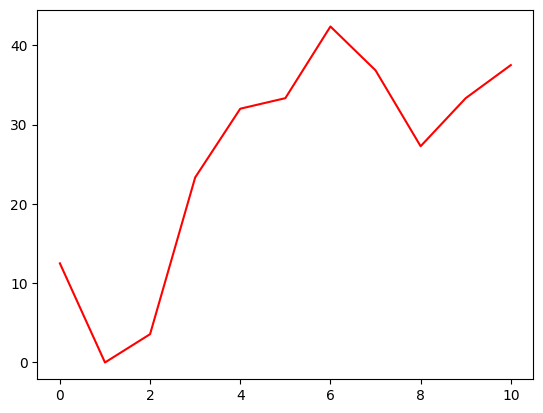

In [56]:
yax = np.array(f_lis)
plt.plot(yax, color = 'r')
plt.show()

The higher the size of the tumour the more proportion of patients that experienced recurrence.<br>
I want to compute the same proportion looking at the aggressiveness of the tumour and its size.

In [57]:
# run through a while loop to iterate proportion() for 11 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'deg_malig',1)
    print(res,"% of patients who had group",count,'tumour size and lowest degree of malignancy')
    lis.append(res)
    count +=1

37.5 % of patients who had group 0 tumour size and lowest degree of malignancy
50.0 % of patients who had group 1 tumour size and lowest degree of malignancy
50.0 % of patients who had group 2 tumour size and lowest degree of malignancy
30.0 % of patients who had group 3 tumour size and lowest degree of malignancy
20.0 % of patients who had group 4 tumour size and lowest degree of malignancy
20.37 % of patients who had group 5 tumour size and lowest degree of malignancy
22.03 % of patients who had group 6 tumour size and lowest degree of malignancy
10.53 % of patients who had group 7 tumour size and lowest degree of malignancy
22.73 % of patients who had group 8 tumour size and lowest degree of malignancy
33.33 % of patients who had group 9 tumour size and lowest degree of malignancy
12.5 % of patients who had group 10 tumour size and lowest degree of malignancy


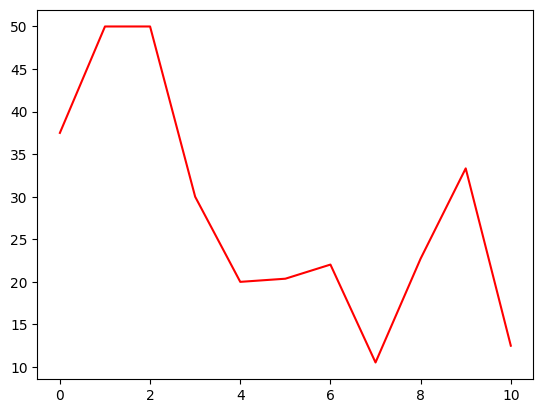

In [58]:
yax = np.array(lis)
plt.plot(yax, color = 'r')
plt.show()

<ins>*for Giovanni Notes*:</ins> There is an unexpected peak at 9 group tumour size. I don't feel is relevant.

In [59]:
# run through a while loop to iterate proportion() for 11 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'deg_malig',3)
    print(res,"% of patients who had group",count,'tumour size and highest degree of malignancy')
    lis.append(res)
    count +=1

12.5 % of patients who had group 0 tumour size and highest degree of malignancy
nan % of patients who had group 1 tumour size and highest degree of malignancy
7.14 % of patients who had group 2 tumour size and highest degree of malignancy
20.0 % of patients who had group 3 tumour size and highest degree of malignancy
26.0 % of patients who had group 4 tumour size and highest degree of malignancy
31.48 % of patients who had group 5 tumour size and highest degree of malignancy
42.37 % of patients who had group 6 tumour size and highest degree of malignancy
52.63 % of patients who had group 7 tumour size and highest degree of malignancy
36.36 % of patients who had group 8 tumour size and highest degree of malignancy
33.33 % of patients who had group 9 tumour size and highest degree of malignancy
12.5 % of patients who had group 10 tumour size and highest degree of malignancy


In [60]:
# replace nan value to 0.0 ans store to new list f_lis
import math
f_lis = []

for n in lis:
    if math.isnan(n):
        n=0.0
        f_lis.append(n)
    else:
        f_lis.append(n)

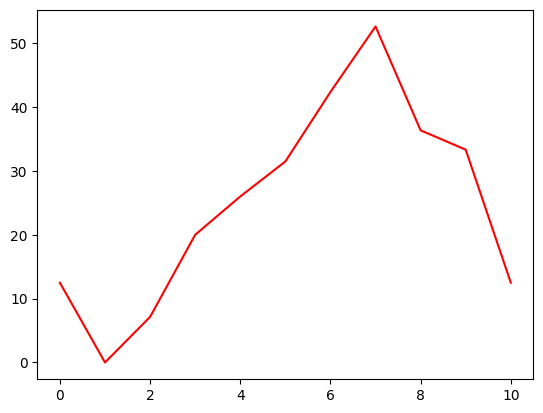

In [61]:
yax = np.array(f_lis)
plt.plot(yax, color = 'r')
plt.show()

The size of the tumour is higher in value for patients with high aggressiveness than patients with low aggressiveness.<br>

From this exploratory analysis I can conclude that, in fact:
- high aggressiveness is linked with probability of recurrence of the tumour.
- high number of invaded lymph nodes results in high probability that their caps will be perforated by the tumour.
- the highest the aggressiveness the more lymph nodes will be invaded by the tumour.
- patients who get radiation are less likely to experience recurrence, but that is not the case for all patients.
- tumour size, aggressiveness and recurrence events are linked. The more aggressive is the tumour, the more it will be in size and the higher the probability to experience a recurrence.

<ins>*for Giovanni Notes*:</ins> I didn't investigate:
- menopause with aggressiveness and recurrence as I don't feel I have enough relevant data to evaluate if *longer exposure to estrogen results in higher rate of breast cancer appearing and recurrence*.
- left or right breast nor the quadrant.


> For further insights about this data and real-time updates check out **my Dash dashboard** deployed on **Amazon Web Services** using AWS Elastic Beanstalk:<br>
http://dashboardbreastcanceranalysis-env.eba-cpv243mm.eu-west-2.elasticbeanstalk.com/


<ins>*for Giovanni Notes*:</ins> my code and requirement ```.txt``` file are inside the repository respectively named ```application.py``` and ```requirements.txt```

## Feature Selection

The target variable is ```'class'``` as the output of the model should be wether or note the patient is subject to recurrence of the disease.<br>

I want to proceed with feature selection to understand the most important features for the model. 

In [62]:
# Independent and dependent variables
y = data['class']
X = data.drop(['class'], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)    

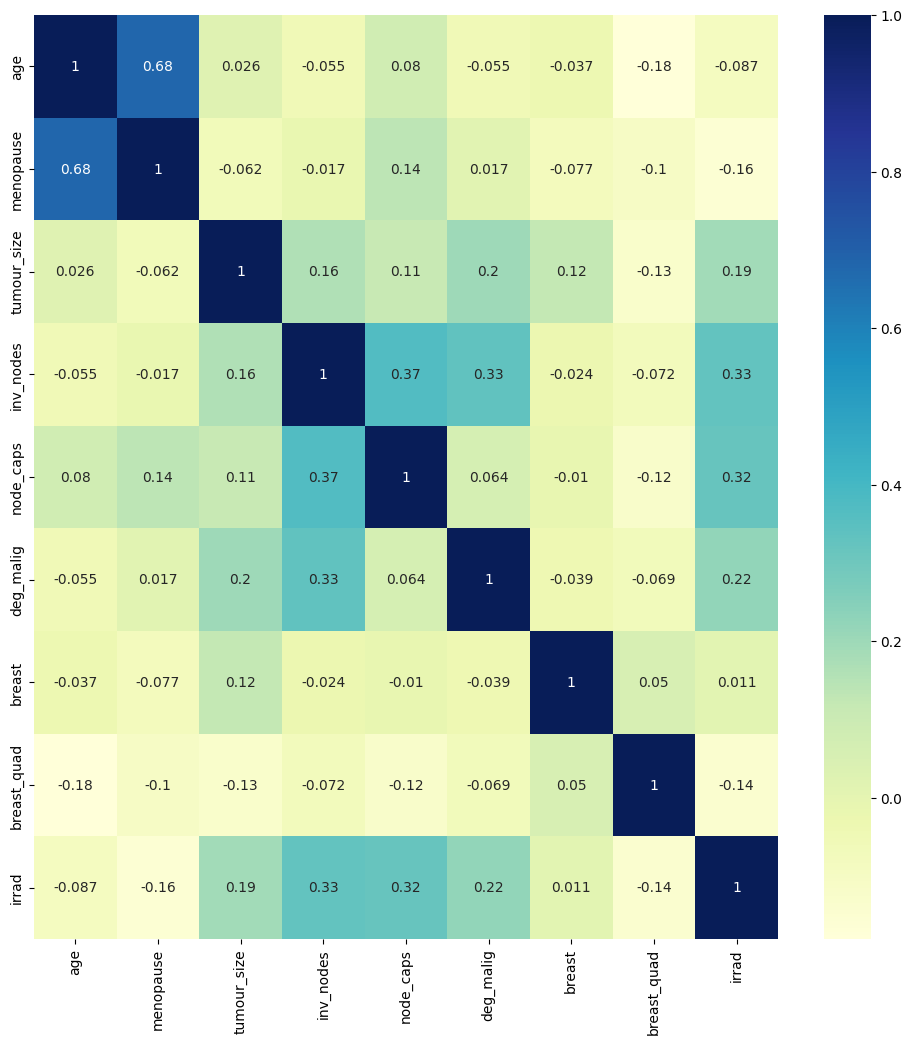

In [64]:
# vsualize the correlation between train features with a heatmap
cor = X_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()  

#### Feature Selection Using Random Forest Classifier

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

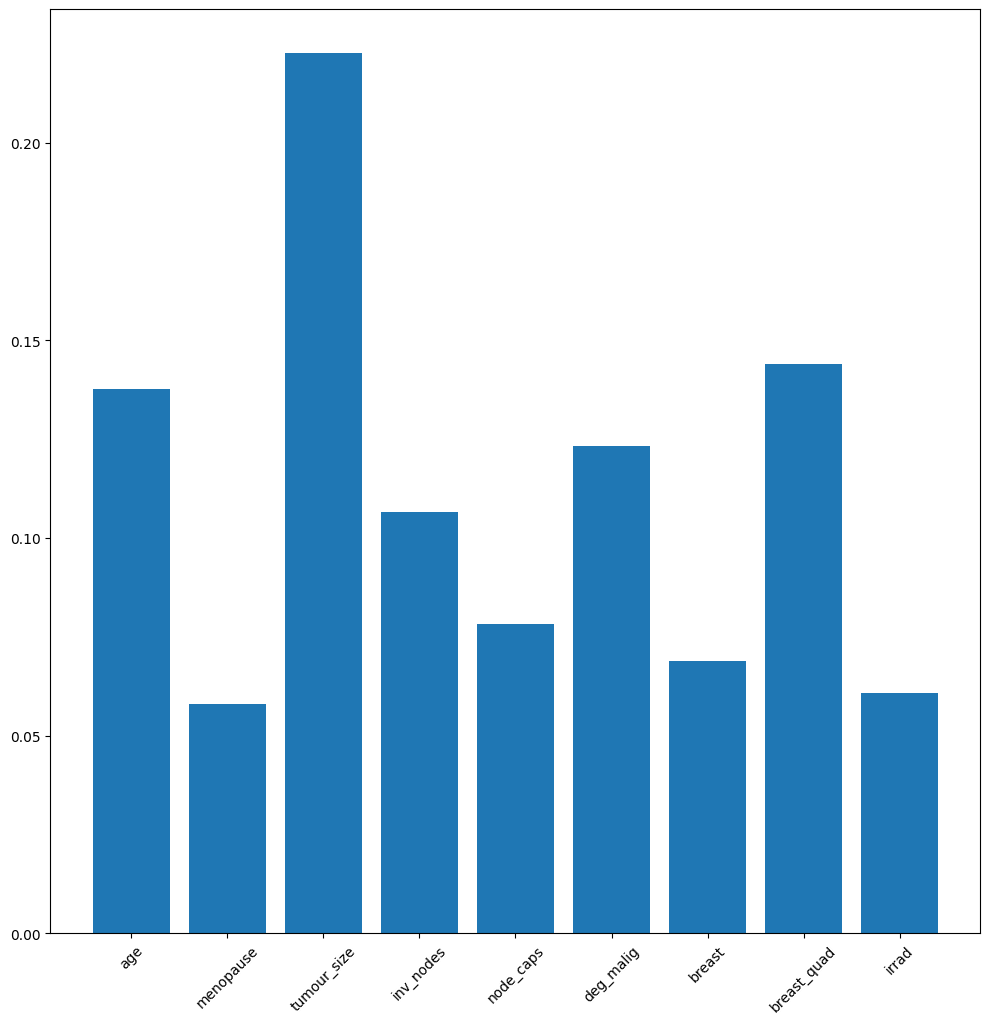

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

The above histogram shows the importance of each feature.<br>
In this case, ```'tumour_size'```, ```'age'```, ```'breast_quad'``` and ```'deg_malig'``` have the highest importance.

#### Training different models to evaluate performance

In [66]:
# import the libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

<ins>*for Giovanni Notes*:</ins> I created a quick function to view the metrics of all the models I chose to evaluate.

In [67]:
# create function
def model_metrics(model):
    model=model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,'score:',round(model.score(X_train,y_train),4))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print(model,'mean squared error:',round(mse,4))
    print(model,'mean absolute error:',round(mae,4),'\n')

In [68]:
# store the models to evaluate into a list
models_list = [RandomForestClassifier(),LogisticRegression(),KNeighborsRegressor(n_neighbors=1),GaussianNB(),DecisionTreeClassifier()]

In [69]:
# iterate through the list
for model in models_list:
    model_metrics(model)

RandomForestClassifier() score: 0.9895
RandomForestClassifier() mean squared error: 0.2211
RandomForestClassifier() mean absolute error: 0.2211 

LogisticRegression() score: 0.7421
LogisticRegression() mean squared error: 0.3158
LogisticRegression() mean absolute error: 0.3158 

KNeighborsRegressor(n_neighbors=1) score: 0.9483
KNeighborsRegressor(n_neighbors=1) mean squared error: 0.3053
KNeighborsRegressor(n_neighbors=1) mean absolute error: 0.3053 

GaussianNB() score: 0.7368
GaussianNB() mean squared error: 0.2526
GaussianNB() mean absolute error: 0.2526 

DecisionTreeClassifier() score: 0.9895
DecisionTreeClassifier() mean squared error: 0.3263
DecisionTreeClassifier() mean absolute error: 0.3263 



##### Cross-validation 

In [70]:
from sklearn.model_selection import KFold, cross_val_score
import statistics

k_f = KFold(n_splits=10, shuffle=True)

In [71]:
def crossvalidation_score(model):
    model_score = cross_val_score(model, X, y, cv =k_f, scoring='accuracy')
    print('----',model,':','----')
    print(model_score,'\n')
    print('Mean:',model_score.mean())
    print('Standard Deviation:',statistics.stdev(model_score), '\n')

In [72]:
# iterate through the list
for model in models_list:
    crossvalidation_score(model)

---- RandomForestClassifier() : ----
[0.55172414 0.75862069 0.55172414 0.62068966 0.82758621 0.82142857
 0.78571429 0.64285714 0.82142857 0.78571429] 

Mean: 0.7167487684729064
Standard Deviation: 0.11285191177694609 

---- LogisticRegression() : ----
[0.65517241 0.62068966 0.93103448 0.75862069 0.86206897 0.82142857
 0.60714286 0.67857143 0.75       0.64285714] 

Mean: 0.7327586206896552
Standard Deviation: 0.1106746356491427 

---- KNeighborsRegressor(n_neighbors=1) : ----
[0.62068966 0.79310345 0.72413793 0.65517241 0.5862069  0.64285714
 0.67857143 0.89285714 0.57142857 0.75      ] 

Mean: 0.6915024630541872
Standard Deviation: 0.0998478307337171 

---- GaussianNB() : ----
[0.79310345 0.68965517 0.62068966 0.68965517 0.65517241 0.78571429
 0.71428571 0.85714286 0.75       0.67857143] 

Mean: 0.7233990147783251
Standard Deviation: 0.07219639032599472 

---- DecisionTreeClassifier() : ----
[0.5862069  0.5862069  0.75862069 0.5862069  0.51724138 0.57142857
 0.60714286 0.5        0.642

There is more data I would integrate in the prediction model to increase real-world applications and prediction precision:
- Biometric Data
- Genetic Data